In [ ]:
!pip install pymc==4.1.4
import pymc as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

In [2]:
df = pd.read_csv("/content/drive/MyDrive/projects/pymc3_sample/book-data/2-4-1-beer-sales-1.csv")
df.head()

,sales
0,87.47
1,103.67
2,83.29
3,131.91
4,106.59


In [5]:
x_data = df["sales"].to_numpy()

with pm.Model() as model:
  # 期待値は分からないので一様分布を考える
  mu = pm.Flat("mu")
  # 期待値は分からないので一様分布を考える(ただし、0以上)
  sigma = pm.HalfFlat("sigma")
  # 売り上げは正規分布に従っていると考える
  sales = pm.Normal("sales", mu=mu, sigma=sigma, observed=x_data)

In [6]:
with model:
  trace = pm.sample(draws=3000, tune=1000, chains=3, random_seed=1, return_inferencedata=True)

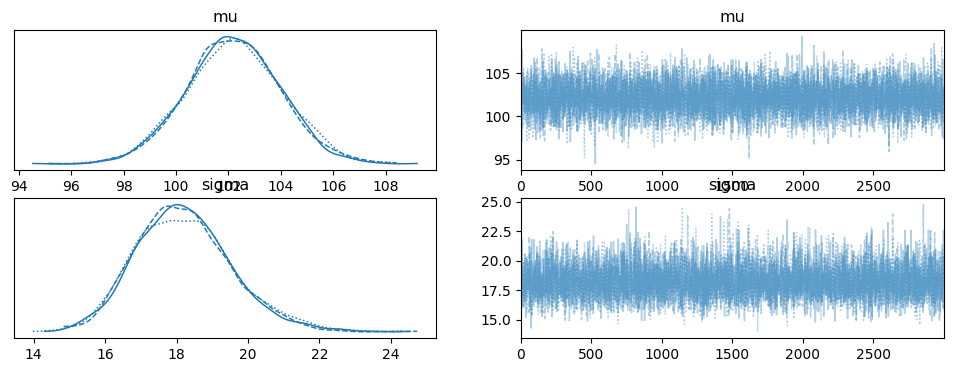

In [7]:
# サンプルから事後分布を可視化する、チェーンの混じり具合を確認する
az.plot_trace(trace);

In [8]:
# Rハットも確認する
for var_info in az.rhat(trace).values():
  print(f"{var_info.name} {var_info.values.round(3)}")

mu 1.0
sigma 1.001


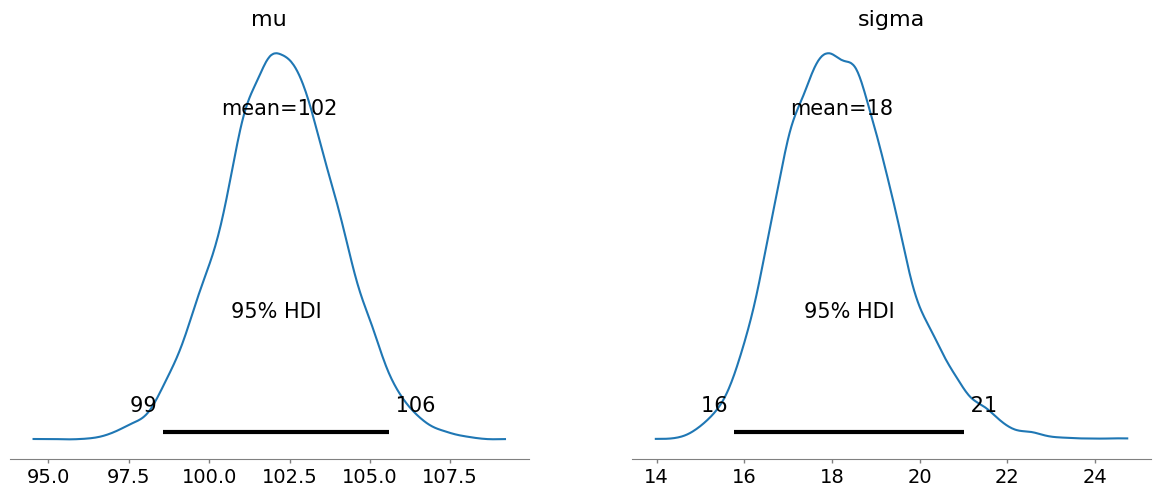

In [9]:
# 95%信用区間の確認
az.plot_posterior(trace, hdi_prob=0.95);

In [10]:
# 事後予測の確認
# データによく適合した統計モデルを作ることができたなら、データとよく似たデータをそこから生成できるはずである
# Posterior Predictive Check?
with model:
  pred = pm.sample_posterior_predictive(trace, random_seed=1)

In [11]:
y_pred = pred.posterior_predictive["sales"].to_numpy().reshape(-1, 100)

print(y_pred.shape)

(9000, 100)


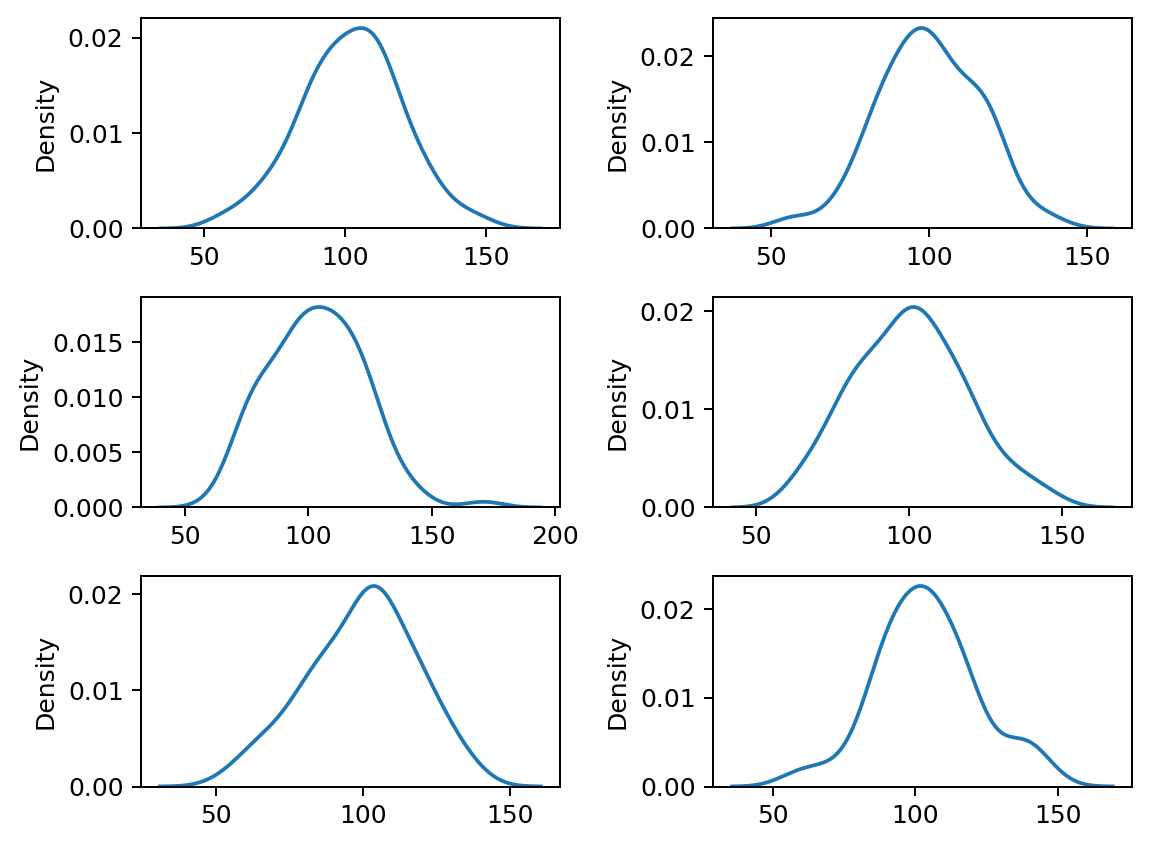

In [12]:
fig, ax = plt.subplots(3, 2, dpi=180)
ax = ax.flatten()
sns.kdeplot(x_data, ax=ax[0], label="original")
for i in range(1, 6):
  sns.kdeplot(y_pred[i-1], ax=ax[i], label=f"sample_{i}")
plt.tight_layout()
plt.show()